# Financial stock analysis

In [39]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
start=datetime.datetime(2014,1,1)
end=datetime.datetime(2019,1,1)

In [43]:
BAC=web.DataReader('BAC', 'iex', start, end) #bank of america
C=web.DataReader('C', 'iex', start, end) #citigroup
GS=web.DataReader('GS', 'iex', start, end) #goldman sachs
JPM=web.DataReader('JPM', 'iex', start, end)#jpmorgan
MS=web.DataReader('MS', 'iex', start, end)#morgan stanley
WFC=web.DataReader('WFC', 'iex', start, end)#wells fargo

In [48]:
#creating tickers all the data in one list in alphabetic order
tickers=['BAC','C','GS','JPM','MS','WFC']
#now concat bank dataframe together
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)

In [45]:
bank_stocks.head()

BAC                                              C           \
               open     high      low    close     volume     open     high   
date                                                                          
2014-02-20  15.1410  15.2717  15.1037  15.2157  107820954  45.8357  45.8877   
2014-02-21  15.2064  15.3884  15.1690  15.2064  106622165  45.5899  45.8546   
2014-02-24  15.2157  15.5237  15.2157  15.4304  103039579  45.6939  46.7840   
2014-02-25  15.4024  15.4584  15.2344  15.2530   81617640  46.2706  46.3841   
2014-02-26  15.2717  15.3090  15.0570  15.2437   90012056  45.7884  45.9586   

                                        ...       MS                    \
                low    close    volume  ...     open     high      low   
date                                    ...                              
2014-02-20  45.2732  45.5048  25242451  ...  26.3236  26.6956  26.2510   
2014-02-21  45.4764  45.6277  26883446  ...  26.6049  27.0586  26.6049   
2014-02-24  45.6750  46.3084  23880484  ...  26.9134  27.7663  26.8136   
2014-02-25  45.6655  45.7601  20509553  ...  27.4578  27.5440  26.8226   
2014-02-26  45.0793  45.6844  28825528  ...  27.1493  27.4329  26.6956   

                                   WFC                                       
              close    volume     open     high      low    close    volume  
date                                                                         
2014-02-20  26.6139  14150762  39.2708  39.6688  39.1497  39.4784  13443399  
2014-02-21  26.8771  10467732  39.4698  39.8505  39.3487  39.4525  15452681  
2014-02-24  27.5032  13224207  39.5650  40.1673  39.5390  39.8678  14234573  
2014-02-25  26.9587  11632619  39.9716  40.0235  39.7553  39.8678  13842818  
2014-02-26  27.1674  15094800  40.1014  40.1706  39.6342  39.8418  13918518  

[5 rows x 30 columns]

In [52]:
#now setting column name levels
bank_stocks.columns.names=['Bank Ticker', 'Stock Info']

In [53]:
bank_stocks.head()

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2014-02-20   15.1410  15.2717  15.1037  15.2157  107820954  45.8357  45.8877   
2014-02-21   15.2064  15.3884  15.1690  15.2064  106622165  45.5899  45.8546   
2014-02-24   15.2157  15.5237  15.2157  15.4304  103039579  45.6939  46.7840   
2014-02-25   15.4024  15.4584  15.2344  15.2530   81617640  46.2706  46.3841   
2014-02-26   15.2717  15.3090  15.0570  15.2437   90012056  45.7884  45.9586   

Bank Ticker                              ...       MS                    \
Stock Info       low    close    volume  ...     open     high      low   
date                                     ...                              
2014-02-20   45.2732  45.5048  25242451  ...  26.3236  26.6956  26.2510   
2014-02-21   45.4764  45.6277  26883446  ...  26.6049  27.0586  26.6049   
2014-02-24   45.6750  46.3084  23880484  ...  26.9134  27.7663  26.8136   
2014-02-25   45.6655  45.7601  20509553  ...  27.4578  27.5440  26.8226   
2014-02-26   45.0793  45.6844  28825528  ...  27.1493  27.4329  26.6956   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2014-02-20   26.6139  14150762  39.2708  39.6688  39.1497  39.4784  13443399  
2014-02-21   26.8771  10467732  39.4698  39.8505  39.3487  39.4525  15452681  
2014-02-24   27.5032  13224207  39.5650  40.1673  39.5390  39.8678  14234573  
2014-02-25   26.9587  11632619  39.9716  40.0235  39.7553  39.8678  13842818  
2014-02-26   27.1674  15094800  40.1014  40.1706  39.6342  39.8418  13918518  

[5 rows x 30 columns]

In [46]:
#explotary data analysis (EDA)
#max close stock price for each bank throughout time period
for tick in tickers:
    print(bank_stocks[tick]['close'].max())

32.3681
77.7974
270.4223
116.856
57.4768
63.483


In [54]:
#explotary data analysis (EDA)
#max close stock price for each bank throughout time period
#using xs - crossection
bank_stocks.xs(key='close', axis=1,level='Stock Info').max()

Bank Ticker
BAC     32.3681
C       77.7974
GS     270.4223
JPM    116.8560
MS      57.4768
WFC     63.4830
dtype: float64

In [56]:
#creating aloop that returns changes per day i.e closing price
#in diffeent column for every bank
returns=pd.DataFrame()
for tick in tickers:
    returns[tick+' Returns']= bank_stocks[tick]['close'].pct_change()

In [57]:
returns.head(5)
#if you see the chart then its okay if you see line then its negative corr due to financial crash

BAC Returns  C Returns  GS Returns  JPM Returns  MS Returns  \
date                                                                      
2014-02-20          NaN        NaN         NaN          NaN         NaN   
2014-02-21    -0.000611   0.002701    0.000000     0.000522    0.009890   
2014-02-24     0.014731   0.014919    0.012401     0.007290    0.023295   
2014-02-25    -0.011497  -0.011840   -0.018374    -0.017231   -0.019798   
2014-02-26    -0.000610  -0.001654   -0.000799    -0.004910    0.007741   

            WFC Returns  
date                     
2014-02-20          NaN  
2014-02-21    -0.000656  
2014-02-24     0.010527  
2014-02-25     0.000000  
2014-02-26    -0.000652

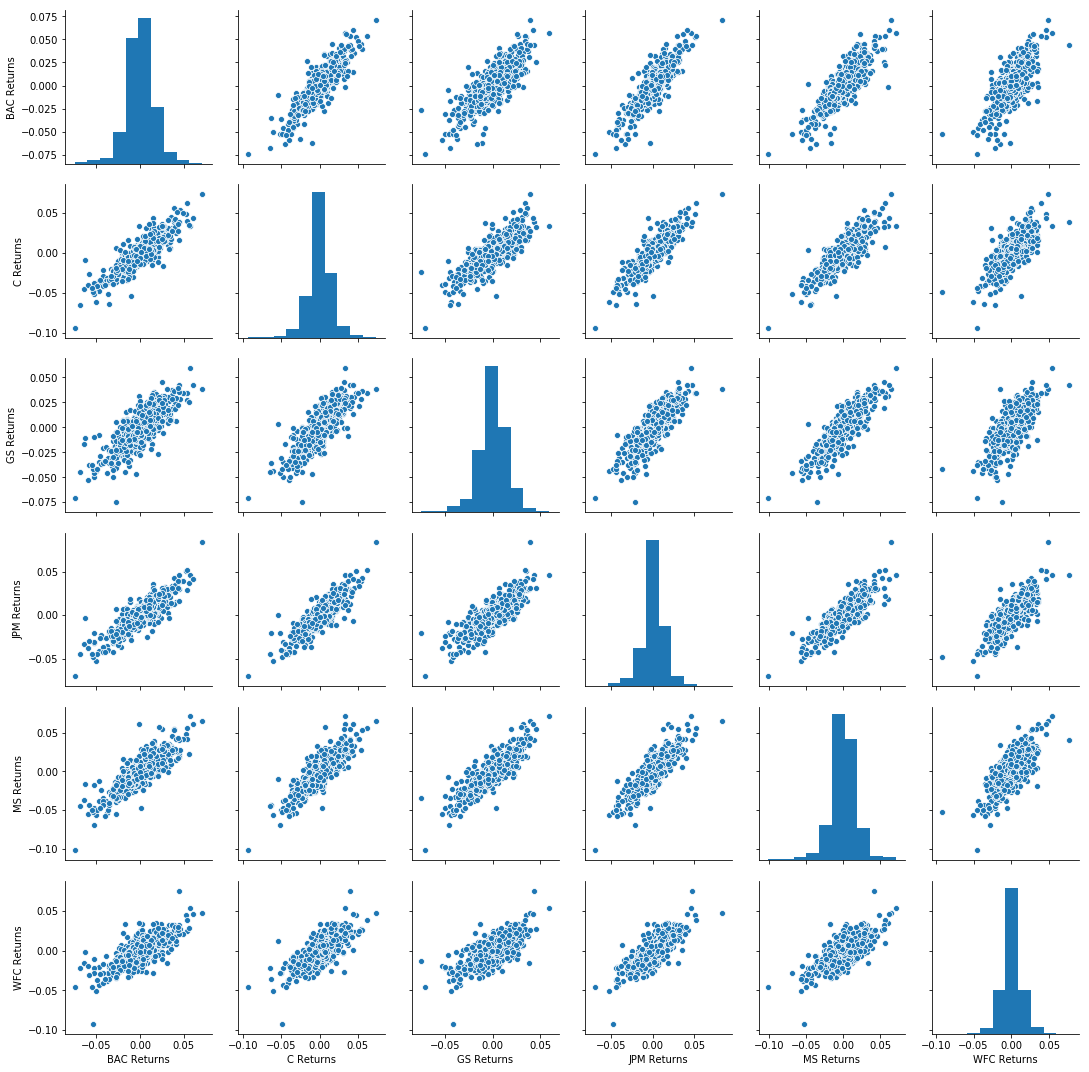

In [60]:
sb.pairplot(returns[1:])

In [62]:
returns.head()

BAC Returns  C Returns  GS Returns  JPM Returns  MS Returns  \
date                                                                      
2014-02-20          NaN        NaN         NaN          NaN         NaN   
2014-02-21    -0.000611   0.002701    0.000000     0.000522    0.009890   
2014-02-24     0.014731   0.014919    0.012401     0.007290    0.023295   
2014-02-25    -0.011497  -0.011840   -0.018374    -0.017231   -0.019798   
2014-02-26    -0.000610  -0.001654   -0.000799    -0.004910    0.007741   

            WFC Returns  
date                     
2014-02-20          NaN  
2014-02-21    -0.000656  
2014-02-24     0.010527  
2014-02-25     0.000000  
2014-02-26    -0.000652

In [72]:
# figure out what date each bank has best and worst retutn
#for single day
#print(returns['C Returns'].argmin())
#or for whole df
returns.idxmin()

BAC Returns    2016-06-24
C Returns      2016-06-24
GS Returns     2018-11-12
JPM Returns    2016-06-24
MS Returns     2016-06-24
WFC Returns    2018-02-05
dtype: object

In [73]:
returns.idxmax()

BAC Returns    2016-02-12
C Returns      2016-02-12
GS Returns     2016-11-09
JPM Returns    2016-02-12
MS Returns     2016-11-09
WFC Returns    2016-11-10
dtype: object

In [74]:
#high std means risky
returns.std()
#all has same risk profile

BAC Returns    0.016086
C Returns      0.015140
GS Returns     0.014375
JPM Returns    0.013152
MS Returns     0.016386
WFC Returns    0.012795
dtype: float64

In [75]:
#and if you want to check for static time period
returns.ix['2015-01-01' : '2015-12-31'].std()
#ms has higher risk

C:\Users\codehax\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


BAC Returns    0.016174
C Returns      0.015288
GS Returns     0.014043
JPM Returns    0.014006
MS Returns     0.016287
WFC Returns    0.012552
dtype: float64

C:\Users\codehax\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


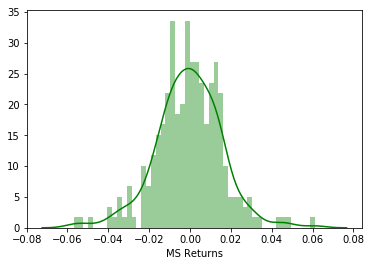

In [80]:
#dist plot for seaborn of 2015 returns of ms
sb.distplot(returns.ix['2015-01-01' : '2015-12-31']['MS Returns'], color='green',
           bins=50)

C:\Users\codehax\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\codehax\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\codehax\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\codehax\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\codehax\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_an

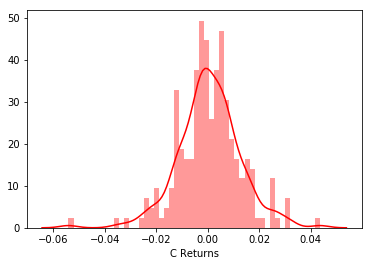

In [82]:
#dist plot for returns of citigroup 2014
sb.distplot(returns.ix['2014-01-01' : '2014-12-31']['C Returns'], color='red', bins=50)

In [84]:
#more visualization
sb.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

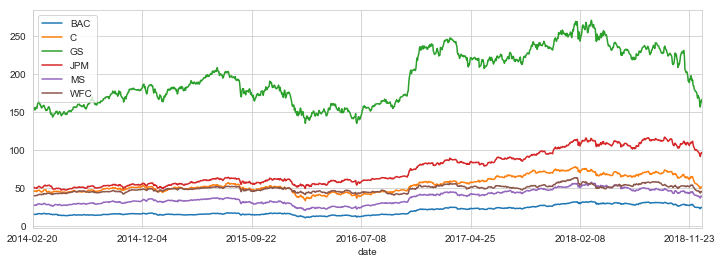

In [87]:
#creting line plot for entire time index  use ix or loop
#using loop
for tick in tickers:
    bank_stocks[tick]['close'].plot(label=tick, figsize=(12,4))
plt.legend()

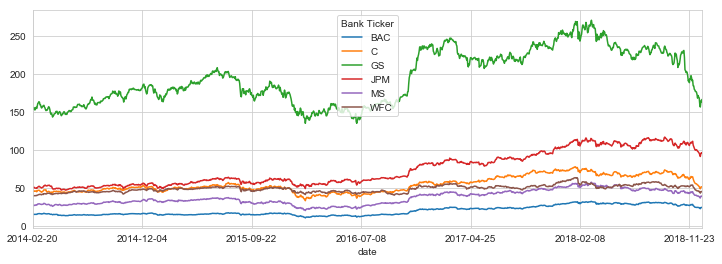

In [89]:
#using xs
bank_stocks.xs(key='close', axis=1, level='Stock Info').plot(figsize=(12,4))

In [91]:
#using cufflinks
bank_stocks.xs(key='close', axis=1, level='Stock Info').iplot()

C:\Users\codehax\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\Users\codehax\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



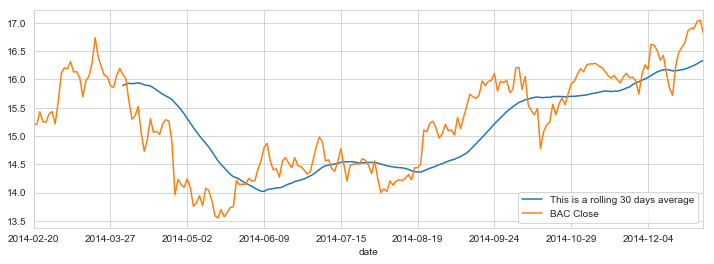

In [94]:
#moving average for year 2014, plot the rolling 30 days average against bac
plt.figure(figsize=(12,4))
BAC['close'].ix['2014-01-01' : '2015-01-01'].rolling(window=30).mean().plot(label='This is a rolling 30 days average')
BAC['close'].ix['2014-01-01' : '2015-01-01'].plot(label='BAC Close')
plt.legend()

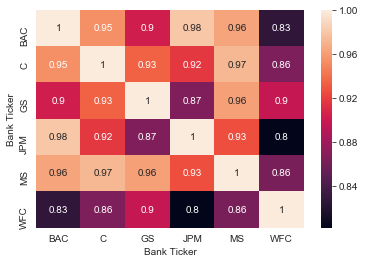

In [95]:
#heat map
sb.heatmap(bank_stocks.xs('close', axis=1, level='Stock Info').corr(),annot=True)

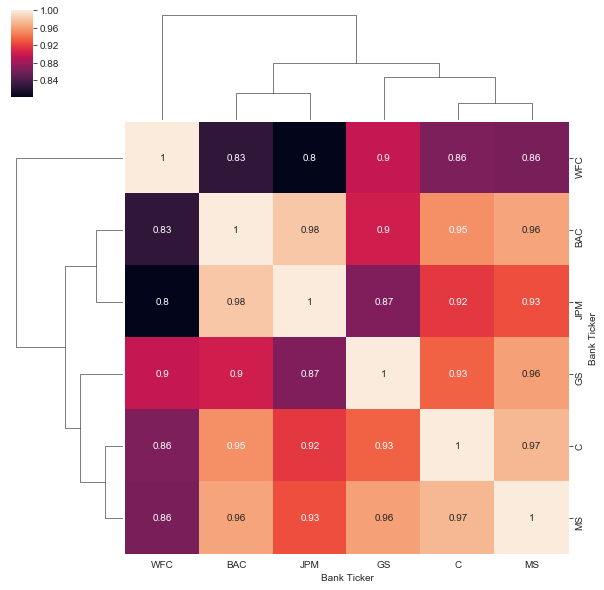

In [96]:
#heat map
sb.clustermap(bank_stocks.xs('close', axis=1, level='Stock Info').corr(),annot=True)

In [102]:
#plot candleplot for bac from 1jan 15 to 1 jan 16
BAC.ix['2015-01-01' : '2016-01-01'].iplot(kind='candle')

C:\Users\codehax\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [104]:
#ploting sma for ms 2015 using ta_plot
MS['close'].ix['2015-01-01' : '2015-12-31'].ta_plot(study='sma', period=[13,21,55])

C:\Users\codehax\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [106]:
#ploting bollinger bond for bac 2015 using ta_plot
BAC['close'].ix['2015-01-01' : '2015-12-31'].ta_plot(study='boll')

C:\Users\codehax\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

